In [1]:
%matplotlib inline 

from __future__ import print_function
# these imports let you use opencv
import cv2          # opencv itself
import numpy as np  # matrix manipulations
from matplotlib import pyplot as plt           # this lets you draw inline pictures in the notebooks
import pylab                                   # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

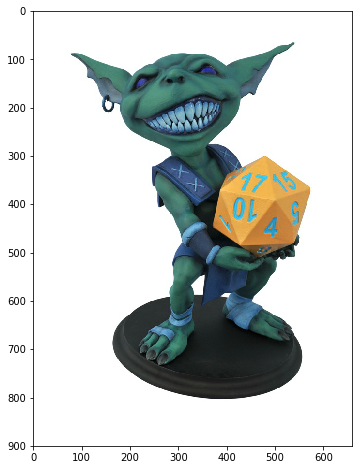

In [3]:
img = cv2.imread('dnd.jpg')

fig = plt.figure().add_subplot(1,1,1)
fig.imshow(img)

# this sort of works
# r = cv2.selectROI(fig, img, False)
# print(r)

# Selective Search

https://www.learnopencv.com/selective-search-for-object-detection-cpp-python/

Total Number of Region Proposals: 167


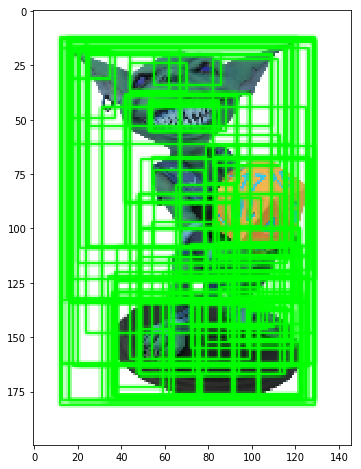

In [4]:
# speed-up using multithreads
cv2.setUseOptimized(True);
cv2.setNumThreads(4);

# read image
im = img
# resize image
newHeight = 200
newWidth = int(im.shape[1]*200/im.shape[0])
im = cv2.resize(im, (newWidth, newHeight))    

# create Selective Search Segmentation Object using default parameters
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

# set input image on which we will run segmentation
ss.setBaseImage(im)

# Switch to fast but low recall Selective Search method
ss.switchToSelectiveSearchFast()

# Switch to high recall but slow Selective Search method
# ss.switchToSelectiveSearchQuality()


# run selective search segmentation on input image
rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))

# number of region proposals to show
numShowRects = 100
# increment to increase/decrease total number
# of reason proposals to be shown
increment = 50

# create a copy of original image
imOut = im.copy()

# itereate over all the region proposals
for i, rect in enumerate(rects):
    # draw rectangle for region proposal till numShowRects
    if (i < numShowRects):
        x, y, w, h = rect
        cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    else:
        break

# show output
plt.imshow(imOut);

        

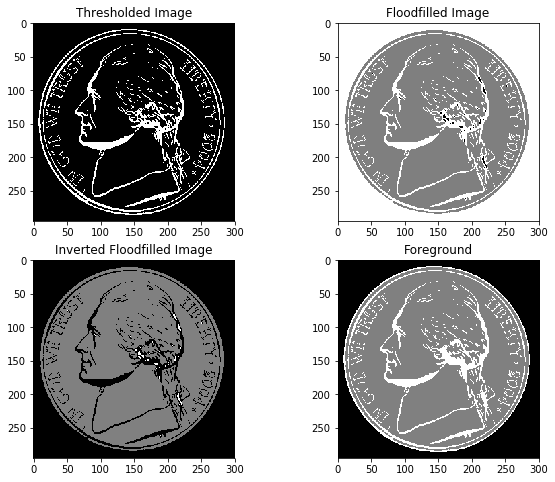

In [8]:
im_in = cv2.imread("nickel.jpg", cv2.IMREAD_GRAYSCALE);

# Threshold.
# Set values equal to or above 220 to 0.
# Set values below 220 to 255.
th, im_th = cv2.threshold(im_in, 220, 255, cv2.THRESH_BINARY_INV);

# Copy the thresholded image.
im_floodfill = im_th.copy()

# Mask used to flood filling.
# Notice the size needs to be 2 pixels than the image.
h, w = im_th.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

# Floodfill from point (0, 0)
cv2.floodFill(im_floodfill, mask, (0,0), 255)
cv2.floodFill(im_floodfill, mask, (150,50), 127)

# Invert floodfilled image
im_floodfill_inv = cv2.bitwise_not(im_floodfill)

# Combine the two images to get the foreground.
im_out = im_th | im_floodfill_inv

# Display images.
plt.subplot(2,2,1)
plt.imshow(im_th, 'gray')
plt.title("Thresholded Image")

plt.subplot(2,2,2)
plt.imshow(im_floodfill, 'gray')
plt.title("Floodfilled Image")

plt.subplot(2,2,3)
plt.imshow(im_floodfill_inv, 'gray')
plt.title("Inverted Floodfilled Image")

plt.subplot(2,2,4)
plt.imshow(im_out, 'gray')
plt.title("Foreground");

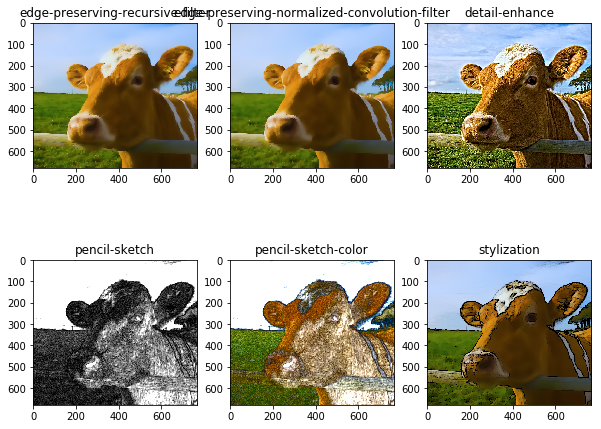

In [17]:
im = cv2.imread("cow.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

# Edge preserving filter with two different flags.
imout = cv2.edgePreservingFilter(im, flags=cv2.RECURS_FILTER);
plt.subplot(2,3,1)
plt.imshow(imout)
plt.title("edge-preserving-recursive-filter")

imout = cv2.edgePreservingFilter(im, flags=cv2.NORMCONV_FILTER)
plt.subplot(2,3,2)
plt.imshow(imout)
plt.title("edge-preserving-normalized-convolution-filter")

# Detail enhance filter
imout = cv2.detailEnhance(im)
plt.subplot(2,3,3)
plt.imshow(imout)
plt.title("detail-enhance")

# Pencil sketch filter
imout_gray, imout = cv2.pencilSketch(im, sigma_s=60, sigma_r=0.07, shade_factor=0.05)
plt.subplot(2,3,4)
plt.imshow(imout_gray, 'gray')
plt.title("pencil-sketch")

plt.subplot(2,3,5)
plt.imshow(imout)
plt.title("pencil-sketch-color")

# Stylization filter
cv2.stylization(im,imout)
plt.subplot(2,3,6)
plt.imshow(imout)
plt.title("stylization");

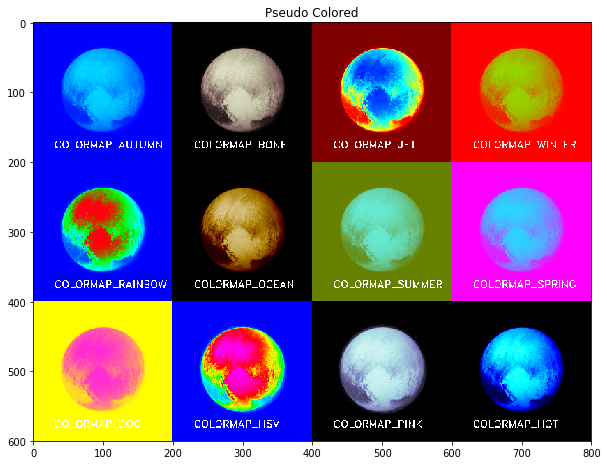

In [13]:
def colormap_name(id) :
    switcher = {
        0 : "COLORMAP_AUTUMN",
        1 : "COLORMAP_BONE",
        2 : "COLORMAP_JET",
        3 : "COLORMAP_WINTER",
        4 : "COLORMAP_RAINBOW",
        5 : "COLORMAP_OCEAN",
        6 : "COLORMAP_SUMMER",
        7 : "COLORMAP_SPRING",
        8 : "COLORMAP_COOL",
        9 : "COLORMAP_HSV",
        10: "COLORMAP_PINK",
        11: "COLORMAP_HOT"

    }
    return switcher.get(id, "NONE")

im = cv2.imread("pluto.jpg", cv2.IMREAD_GRAYSCALE)
im_out = np.zeros((600, 800, 3), np.uint8);

for i in xrange(0,4) :
    for j in xrange(0,3) :
        k = i + j * 4
        im_color = cv2.applyColorMap(im, k)
        cv2.putText(im_color,
                    colormap_name(k), 
                    (30, 180), 
                    cv2.FONT_HERSHEY_DUPLEX, 
                    0.5, 
                    (255, 255, 255), 
                    1)

        ix200 = i * 200
        jx200 = j * 200

        im_out[ jx200 : jx200 + 200 , ix200 : ix200 + 200 , : ] = im_color

plt.imshow(im_out)
plt.title("Pseudo Colored");